# Exploratory Data Analysis (EDA)

This notebook explores revenue patterns using the cleaned sales dataset.
The analysis examines revenue trends over time, geographic concentration,
product-level contribution, and customer-level revenue distribution.

The objective is to identify key business drivers, risks, and opportunities
through data-driven insights.


## Step 1: Monthly Revenue Trend 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sales_df = pd.read_csv("../data/processed/sales_cleaned.csv",  dtype={"InvoiceNo": "string"})
sales_df.shape
sales_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
sales_df['InvoiceDate']=pd.to_datetime(sales_df['InvoiceDate'])

In [4]:
sales_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 530104 entries, 0 to 530103
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  str           
 2   Description  530104 non-null  str           
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[us]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), str(3), string(1)
memory usage: 32.4 MB


In [5]:
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']


In [6]:
sales_df['Revenue'].describe()

count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64

In [7]:
sales_df['Year'] = sales_df['InvoiceDate'].dt.year
sales_df['Month'] = sales_df['InvoiceDate'].dt.month


In [8]:
monthly_revenue=(sales_df.groupby(['Year','Month'])['Revenue'].sum().reset_index())

In [9]:
monthly_revenue.head()


,Year,Month,Revenue
0,2010,12,823746.140
1,2011,1,691364.560
2,2011,2,523631.890
3,2011,3,717639.360
4,2011,4,537808.621


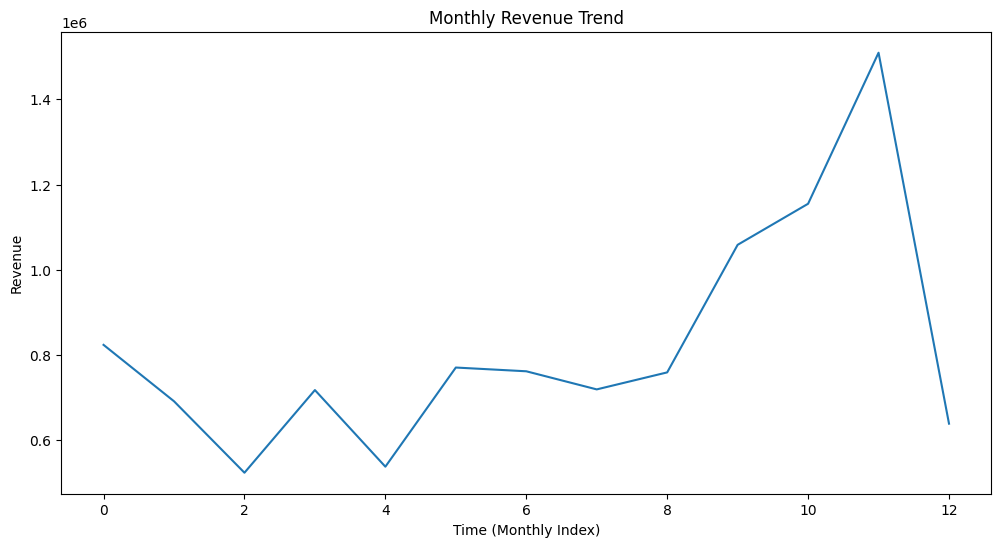

In [10]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['Revenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Time (Monthly Index)")
plt.ylabel("Revenue")
plt.show()

## Monthly Revenue Trend – Key Findings

- Monthly revenue ranges approximately between **0.5M and 1.5M**, indicating high variability rather than stable growth.
- Revenue remains below **0.8M** for most of the early and mid-period, suggesting a baseline demand level.
- A sharp surge occurs in the later months, where revenue exceeds **1.0M** and peaks near **1.5M**, representing the strongest sales period.
- The final month shows a noticeable drop (~**0.65M**), which may indicate partial-month data or post-peak demand decline.

### Business Implications
- Revenue performance is **not uniform across time**, indicating possible **seasonality or event-driven demand**.
- The late-period spike warrants deeper analysis to identify contributing factors such as specific countries, products, or customer behavior.



## STEP 2: Country-Level Revenue Analysis

In [11]:
country_revenue= (sales_df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index())

In [12]:
country_revenue.head()


,Country,Revenue
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110


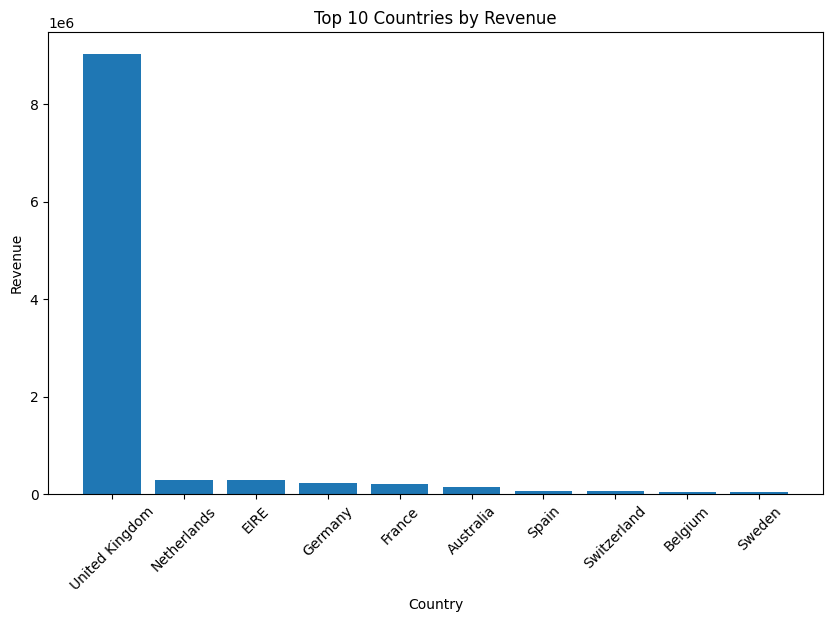

In [13]:
top_countries = country_revenue.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_countries['Country'], top_countries['Revenue'])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [14]:
total_revenue = country_revenue['Revenue'].sum()
top_country_revenue = country_revenue['Revenue'].max()
top_country_share = (top_country_revenue / total_revenue) * 100


top_country_share


np.float64(84.61131522893568)

## Country-Level Revenue Analysis – Key Insights

- Revenue contribution is **extremely concentrated geographically**.
- The **United Kingdom alone contributes ~84.6% of total revenue**, indicating a heavy dependency on a single market.
- The second and third highest contributors (Netherlands and EIRE) contribute only a **small fraction** compared to the UK, with a steep drop after the top country.
- The remaining countries form a long tail, each contributing a **very minor share** of total revenue.

### Business Implications
- Overall revenue trends are **primarily driven by the UK market**, meaning any demand fluctuation in the UK will significantly impact total revenue.
- This level of concentration represents **business risk**, as performance is not geographically diversified.
- Growth opportunities likely exist outside the UK, but current revenue contribution from non-UK markets is underdeveloped.

### Analytical Conclusion
- Any further analysis of seasonality, revenue spikes, or declines should first be examined **within the UK market**, as it dominates overall performance.


## STEP 3: Product-Level Revenue Analysis (UK Focus)
           Business question:
           Is revenue concentrated in a small number of products within the UK?

In [15]:
uk_sales_df = sales_df[sales_df['Country'] == 'United Kingdom']
uk_sales_df.shape


(485123, 11)

In [18]:
product_revenue_uk=(uk_sales_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).reset_index())

In [19]:
product_revenue_uk.head()


,Description,Revenue
0,DOTCOM POSTAGE,206248.77
1,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2,REGENCY CAKESTAND 3 TIER,142273.29
3,WHITE HANGING HEART T-LIGHT HOLDER,100497.72
4,PARTY BUNTING,93658.53


In [20]:
top_products_uk=product_revenue_uk.head(10)

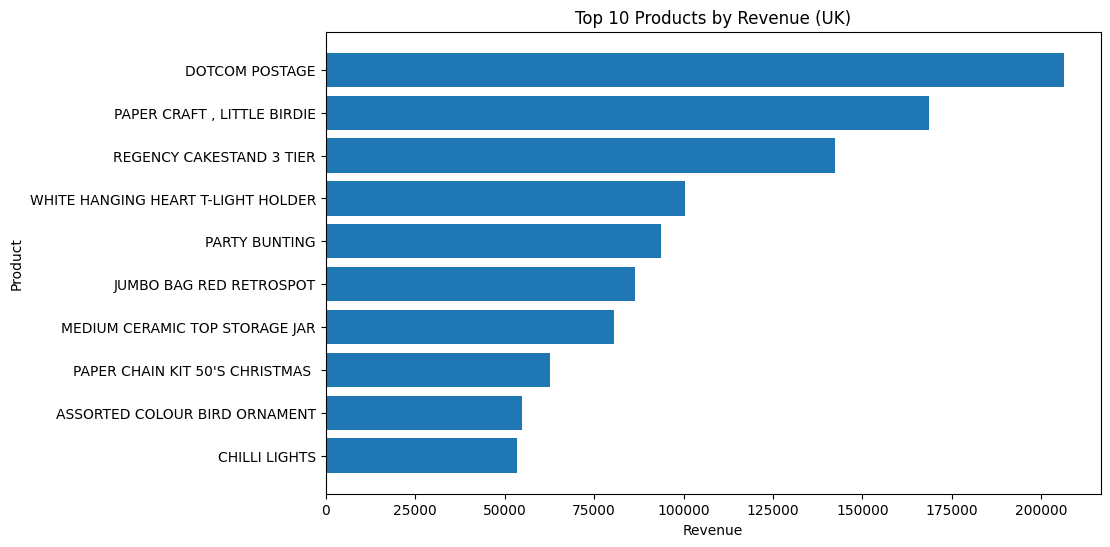

In [25]:
plt.figure(figsize=(10,6))
plt.barh(top_products_uk['Description'],top_products_uk['Revenue'])
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.title("Top 10 Products by Revenue (UK)")
plt.gca().invert_yaxis()
plt.show()

In [26]:
top_10_revenue_share = (
    top_products_uk['Revenue'].sum() / product_revenue_uk['Revenue'].sum()
) * 100

top_10_revenue_share


np.float64(11.623323617262914)

## UK Product-Level Revenue Concentration – Final Insights

- The top 10 revenue-generating products contribute approximately **11.62%** of total UK revenue.
- Despite individual high-performing products (e.g., DOTCOM POSTAGE at ~200K revenue), overall UK revenue is **not overly dependent on a small set of products**.
- Revenue is distributed across a **broad product base**, indicating a diversified product portfolio rather than a few blockbuster items.
- The sharp visual drop after the top products reflects ranking differences, but the percentage contribution confirms **no extreme product-level concentration**.

### Business Implications
- The business is **less exposed to product-specific risk**, as revenue is spread across many products.
- Inventory and sales performance are driven by **volume across the catalog**, not just top sellers.
- Product-level optimization should focus on **incremental improvements across many products** rather than relying solely on top performers.

### Analytical Conclusion
- While the UK market dominates geographically, **product-level revenue is diversified**.
- Revenue risk is primarily **geographic rather than product-driven**, shifting strategic focus toward market expansion and regional diversification.


## STEP 4: Customer-Level Revenue Analysis (Pareto Analysis)

In [28]:
customer_revenue=(sales_df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).reset_index())

In [30]:
customer_revenue.head()

,CustomerID,Revenue
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06


In [32]:
top_10_customer_share=((customer_revenue.head(10)['Revenue'].sum())*100/(customer_revenue['Revenue'].sum()))
top_10_customer_share

np.float64(17.261881248972173)

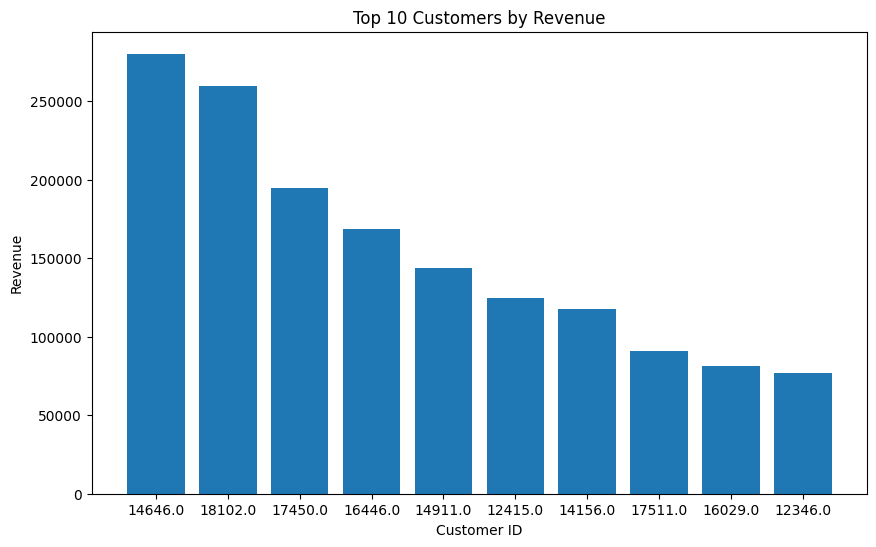

In [33]:
top_customers = customer_revenue.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_customers['CustomerID'].astype(str),
        top_customers['Revenue'])
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.title("Top 10 Customers by Revenue")
plt.show()


## Customer-Level Revenue Analysis – Key Insights (Top 10 Customers)

- The top 10 customers contribute approximately **17.26%** of total revenue.
- This indicates **moderate customer concentration**: a small group of customers is important, but revenue is not dominated by just a few individuals.
- The highest-revenue customer contributes roughly **~280K**, while the 10th-ranked customer contributes around **~75–80K**, showing a gradual decline rather than a sharp drop-off.
- Revenue among top customers is distributed across multiple high-value customers instead of being driven by a single dominant buyer.

### Business Implications
- The business is **not critically dependent on a single customer**, reducing customer-specific revenue risk.
- Retention of top customers remains important, but overall revenue stability benefits from a **diversified customer base**.
- Customer growth strategies should focus on **scaling mid-tier customers**, not only protecting the top few.

### Analytical Conclusion
- Compared to product-level concentration (top 10 products ≈ **11.62%**), customer-level concentration is **slightly higher but still balanced**.
- Revenue risk is **primarily geographic (UK-driven)** rather than customer-driven.


# Project Conclusion

This project analyzed a large-scale online retail dataset using Python to understand
sales performance and revenue drivers. The analysis followed a structured workflow
starting from raw data validation, cleaning, and preparation to exploratory data analysis.

Key findings from the analysis include:

- Revenue shows strong variation over time, indicating non-uniform demand and possible seasonality.
- Sales are heavily concentrated in the United Kingdom, which contributes approximately **84.6%**
  of total revenue, highlighting geographic dependency.
- Product-level revenue is relatively diversified, with the top 10 products contributing
  only **~11.6%** of total UK revenue.
- Customer-level analysis shows moderate concentration, where the top 10 customers contribute
  **~17.3%** of revenue, reducing dependency on individual customers.

Overall, the analysis reveals that revenue risk is primarily **geographic rather than
product- or customer-driven**. The project demonstrates a complete data analysis pipeline,
including data quality validation, business-rule-based cleaning, and insight-driven EDA.

Future work could include customer segmentation, cohort analysis, and forecasting to
support deeper business decision-making.
